In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cross_validation import train_test_split

C:\Users\DWARAKA25\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import warnings

In [4]:
import os

In [5]:
os.chdir('E:\\Ragveen\\freelance')

In [6]:
copres = pd.read_csv('datacstrnth.csv')

In [7]:
copres.head(5)

,S.No,cement,sand,coarse aggregate,Water,W/C Ratio,AGE(Days),Compressive strength
0,1,600,1200,2400,360.0,0.60,7,122.3664
1,2,600,1200,2400,360.0,0.60,28,152.9580
2,3,550,1100,2200,302.5,0.55,7,117.2678
3,4,550,1100,2200,302.5,0.55,28,158.0566
4,5,500,1000,2000,250.0,0.50,7,112.1692


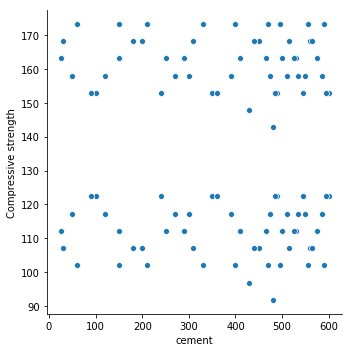

In [8]:
sns.relplot(x="cement", y="Compressive strength", data=copres);

In [9]:
copres.columns

Index(['S.No', 'cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio',
       'AGE(Days)', 'Compressive strength'],
      dtype='object')

In [10]:
del copres['S.No']

In [10]:
copres.describe()

,S.No,cement,sand,coarse aggregate,Water,W/C Ratio,AGE(Days),Compressive strength
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,375.600000,751.200000,1502.400000,189.955000,0.504000,17.500000,136.948396
std,29.011492,176.393843,352.787686,705.575372,94.749746,0.069515,10.552897,26.518068
min,1.000000,25.000000,50.000000,100.000000,12.500000,0.400000,7.000000,91.774800
25%,25.750000,240.000000,480.000000,960.000000,125.000000,0.450000,7.000000,112.169200
50%,50.500000,435.000000,870.000000,1740.000000,207.500000,0.500000,17.500000,132.563600
75%,75.250000,525.000000,1050.000000,2100.000000,261.250000,0.550000,28.000000,163.155200
max,100.000000,600.000000,1200.000000,2400.000000,360.000000,0.600000,28.000000,173.352400


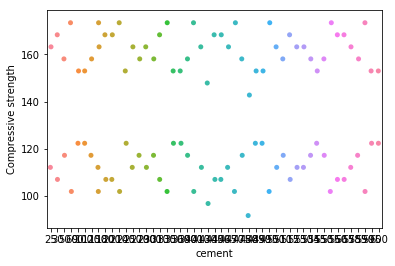

In [11]:


sns.stripplot(x="cement",y="Compressive strength",data=copres)

In [12]:
copres.columns

Index(['S.No', 'cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio',
       'AGE(Days)', 'Compressive strength'],
      dtype='object')

C:\Users\DWARAKA25\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


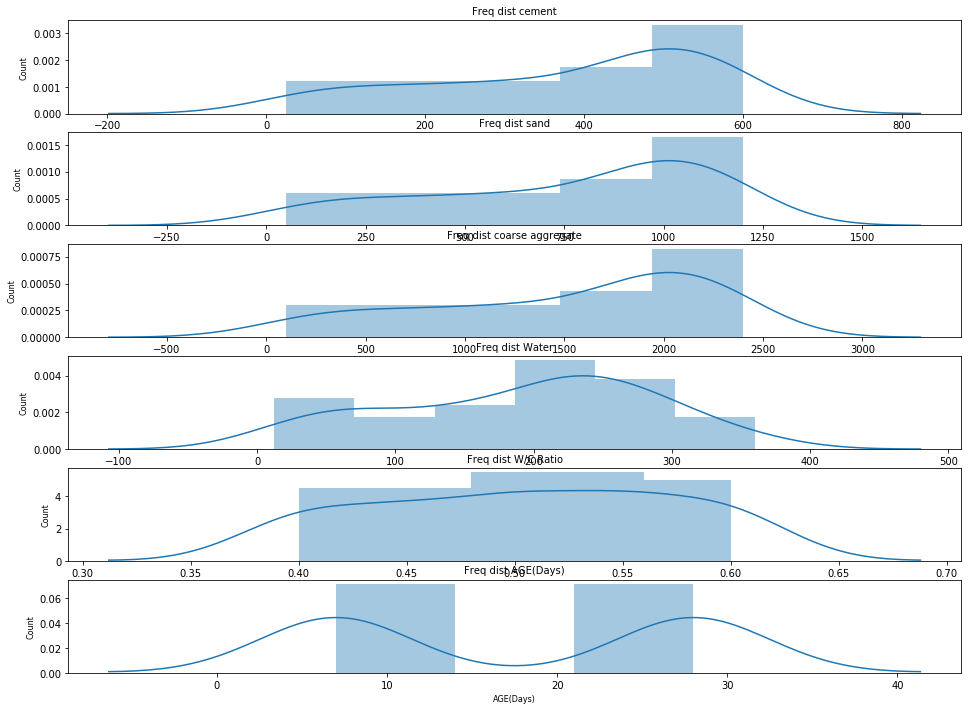

In [16]:
col_names = ['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(copres[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

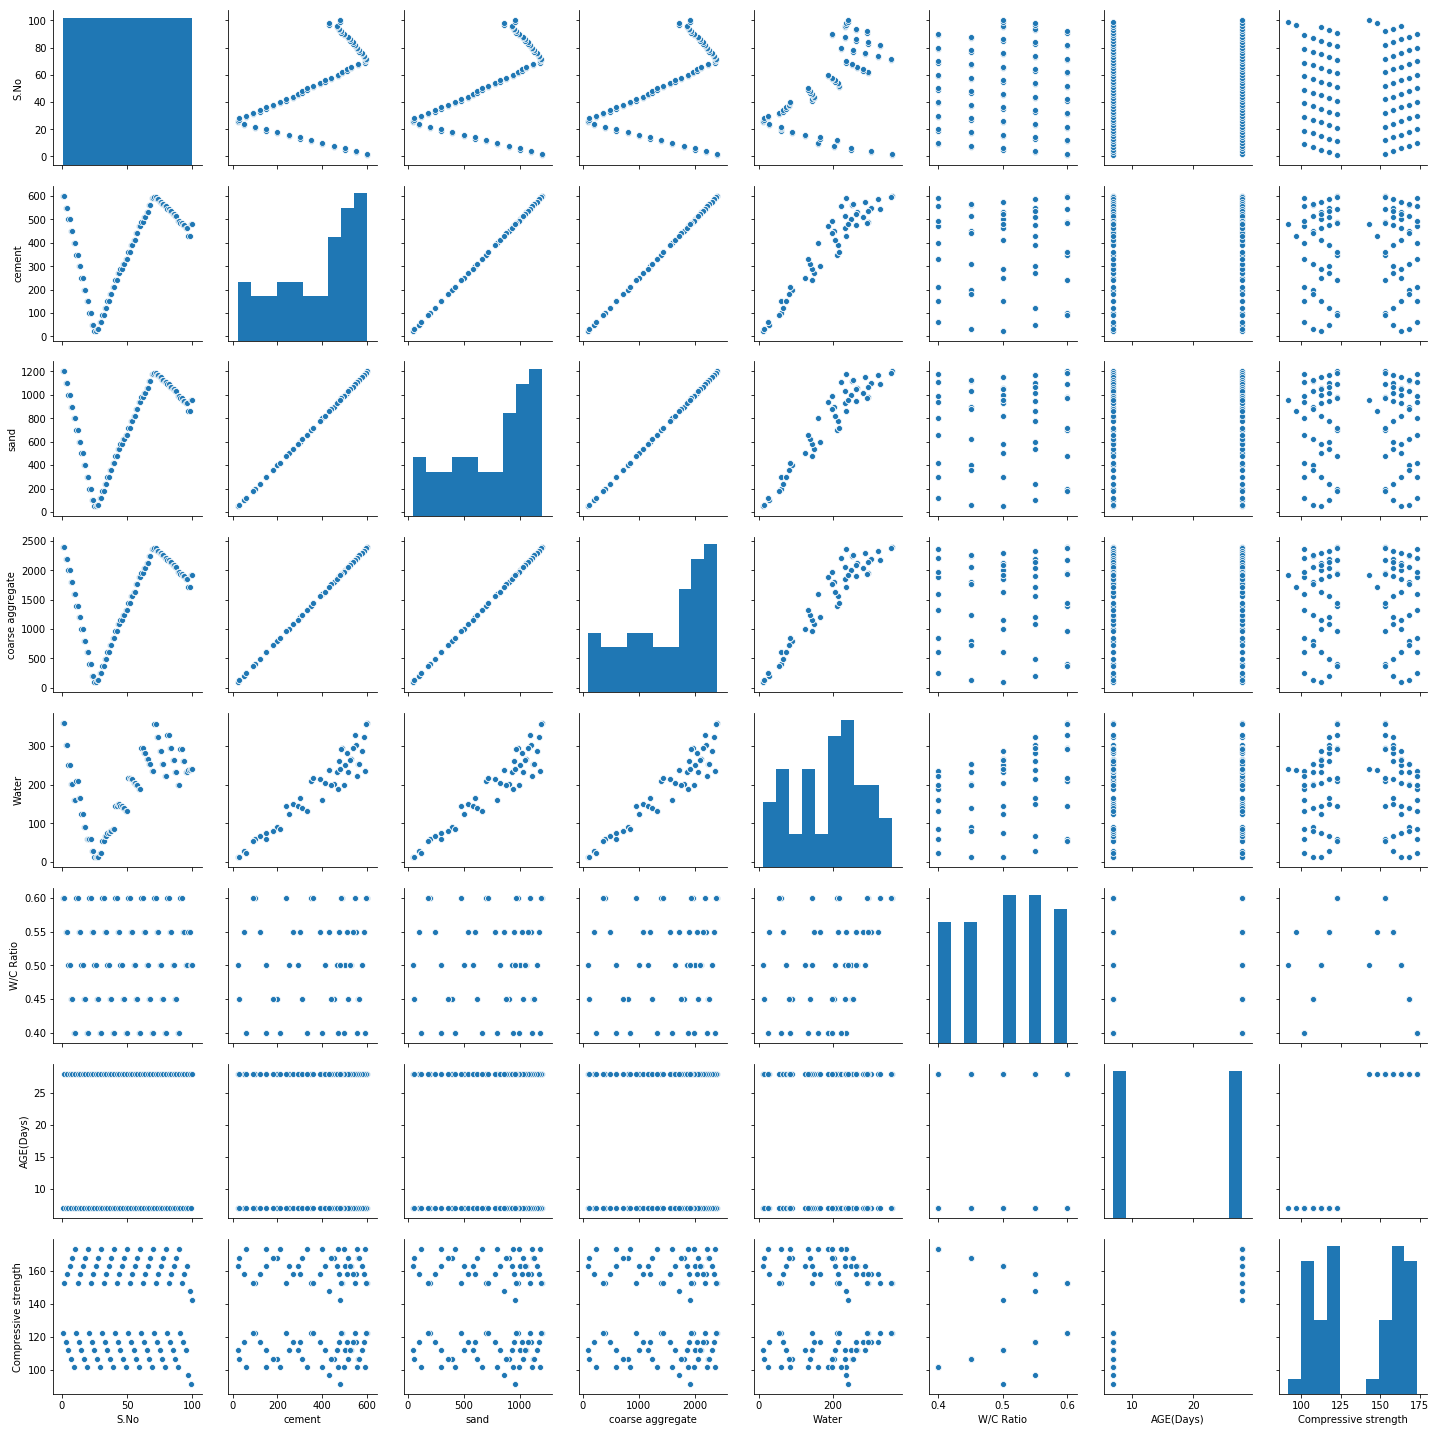

In [17]:
sns.pairplot(copres)

In [18]:
copres.isnull().sum()

S.No                    0
cement                  0
sand                    0
coarse aggregate        0
Water                   0
W/C Ratio               0
AGE(Days)               0
Compressive strength    0
dtype: int64

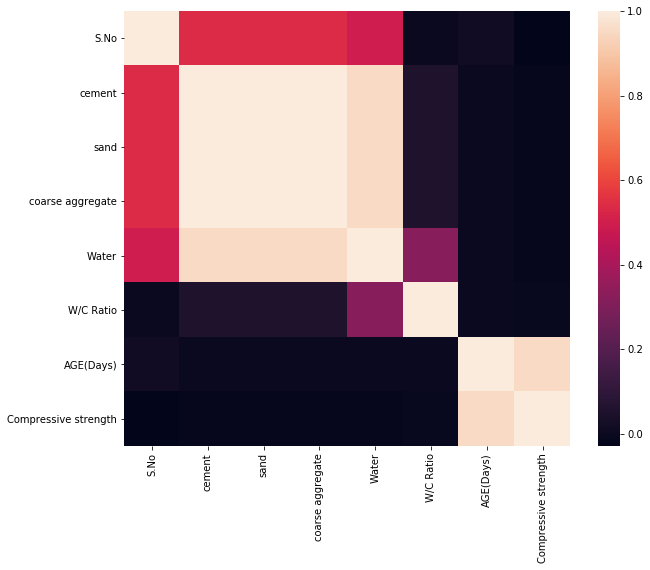

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
corr = copres.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
copres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
S.No                    100 non-null int64
cement                  100 non-null int64
sand                    100 non-null int64
coarse aggregate        100 non-null int64
Water                   100 non-null float64
W/C Ratio               100 non-null float64
AGE(Days)               100 non-null int64
Compressive strength    100 non-null float64
dtypes: float64(3), int64(5)
memory usage: 6.3 KB


In [21]:
print("Number of rows    :",copres.shape[0])
print("Number of columns :",copres.shape[1])

Number of rows    : 100
Number of columns : 8


In [22]:
copres.columns

Index(['S.No', 'cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio',
       'AGE(Days)', 'Compressive strength'],
      dtype='object')

In [25]:
#del copres['S.No']
copres.columns

Index(['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength'],
      dtype='object')

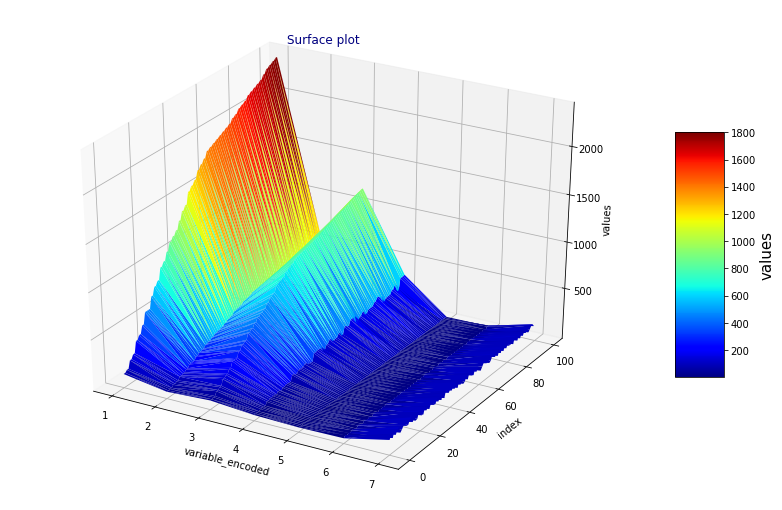

In [26]:
from mpl_toolkits.mplot3d import Axes3D
data1 = copres.copy()
data1 = data1.sort_values(by=['coarse aggregate'],ascending=True).reset_index()

data1 = data1[['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength']] 

df = data1.unstack().reset_index()
df.columns = ["X","Y","Z"]


df["X"] = df["X"].map({'coarse aggregate':1, 'cement':2 , 
                       'sand':3, 'Water':4, 'W/C Ratio':5,
                       'water':5, 'super_plasticizer':7,
                        'AGE(Days)':6, 'Compressive strength':7})
 
fig = plt.figure(figsize=(14,9))

ax  = fig.gca(projection = "3d")

surf = ax.plot_trisurf(df["X"],df["Y"],df["Z"],cmap="jet",linewidth=2)
lab  = fig.colorbar(surf,shrink=.5,aspect=5)
lab.set_label("values",fontsize=15)

ax.set_xlabel("variable_encoded")
ax.set_ylabel("index")
ax.set_zlabel("values")

plt.title("Surface plot",color="navy")
plt.show()

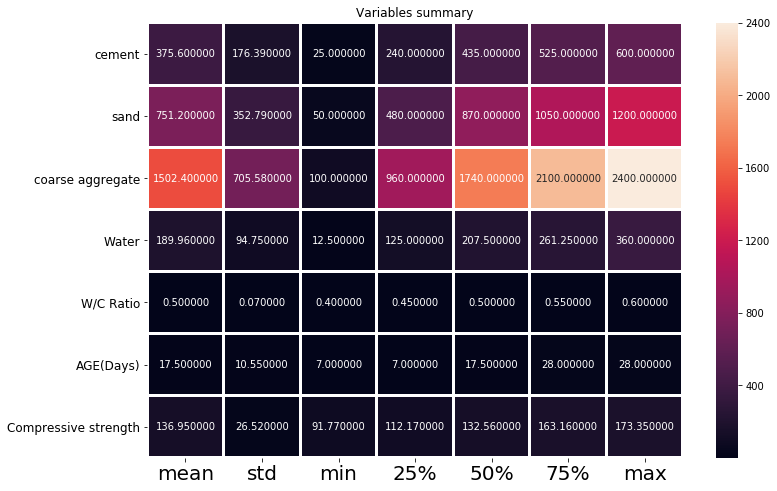

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(round(copres.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

C:\Users\DWARAKA25\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

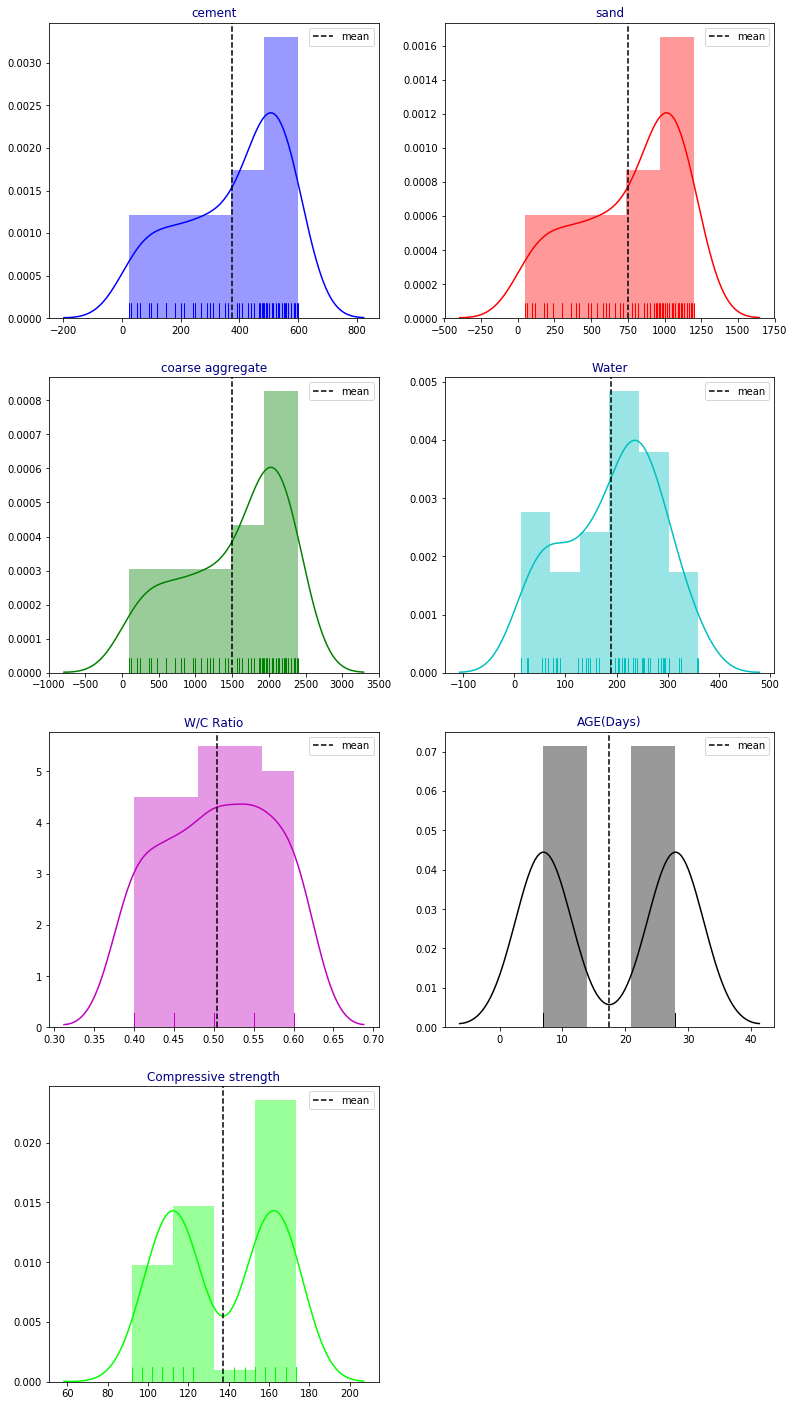

In [31]:
import itertools
cols = [i for i in copres.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(copres[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(copres[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

C:\Users\DWARAKA25\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


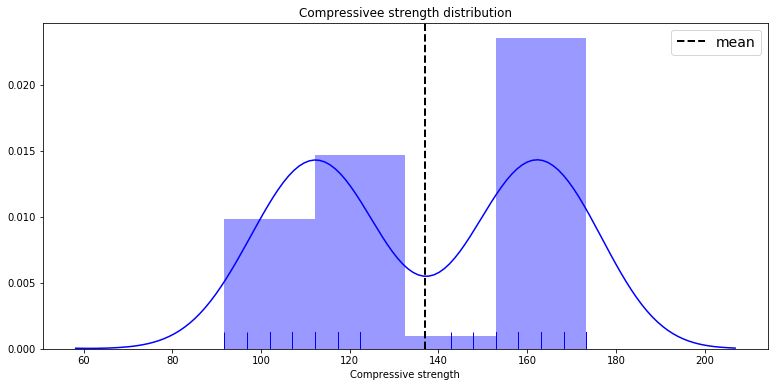

In [33]:
plt.figure(figsize=(13,6))
sns.distplot(copres["Compressive strength"],color="b",rug=True)
plt.axvline(copres["Compressive strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

C:\Users\DWARAKA25\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


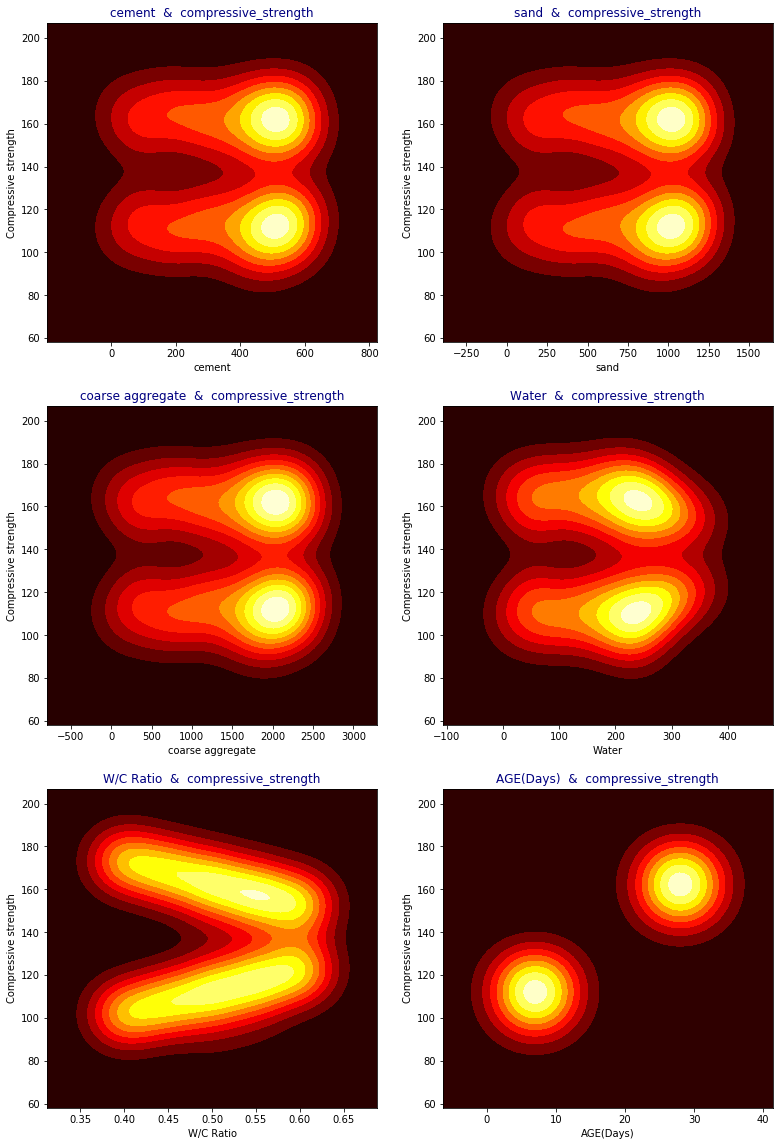

In [34]:
cols = [i for i in copres.columns if i not in 'Compressive strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(copres[i],
                copres["Compressive strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  compressive_strength",color="navy")

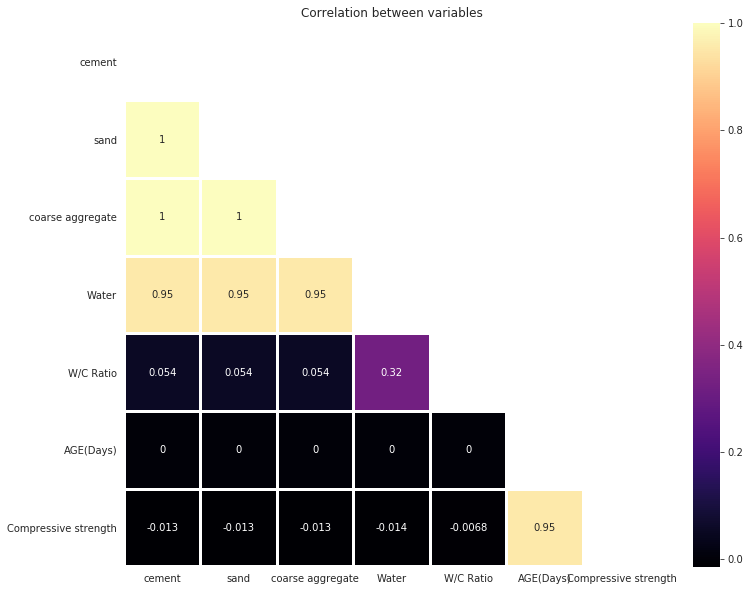

In [35]:
cor = copres.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

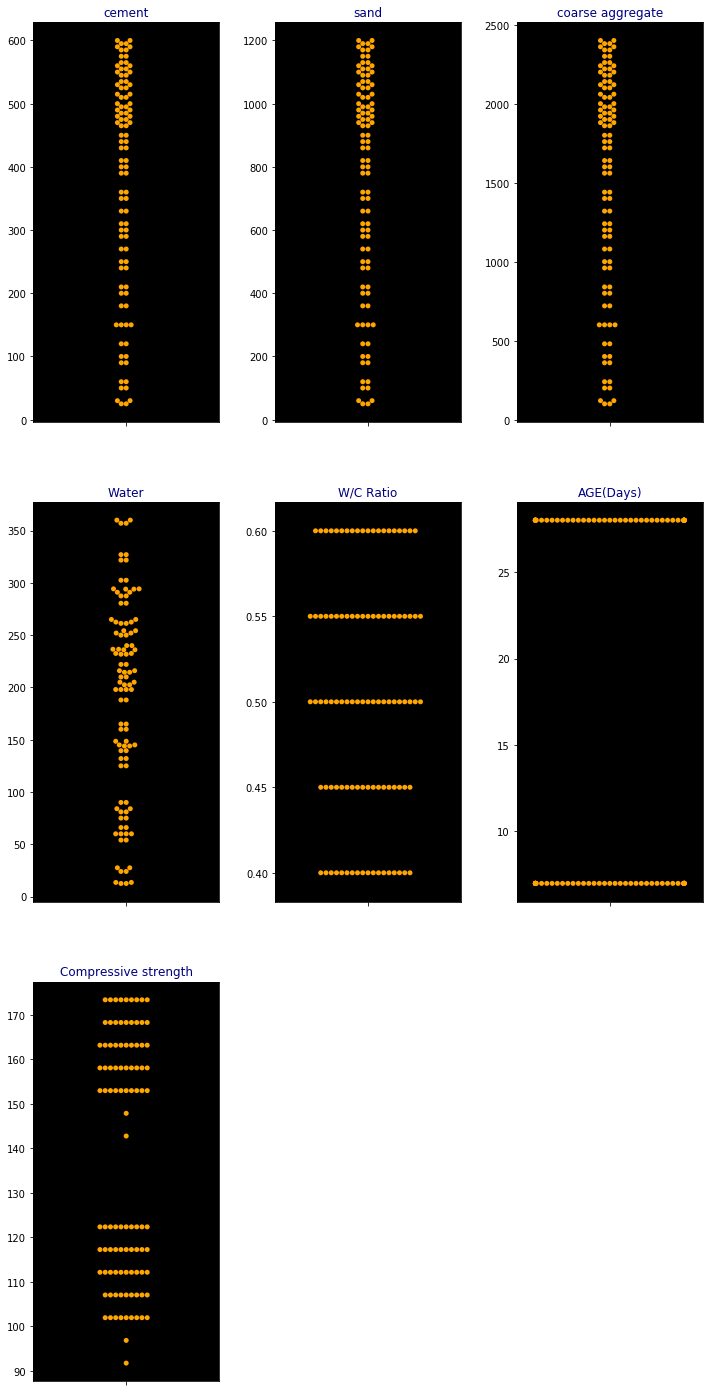

In [36]:
cols = ['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength'] 



length = len(cols)

plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(cols,range(length)):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = copres[i],color="orange")
    ax.set_facecolor("k")
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

In [37]:
copres.columns

Index(['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength'],
      dtype='object')

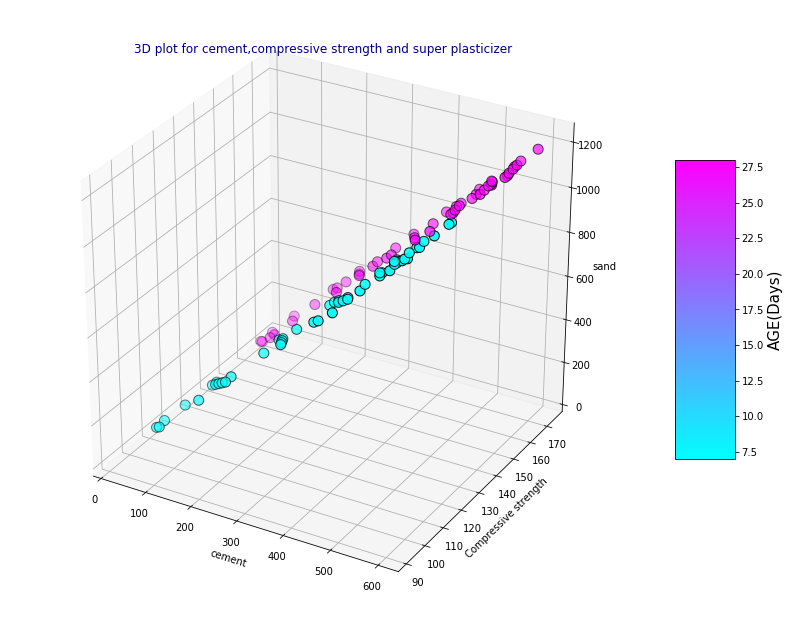

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(copres["cement"],
           copres["Compressive strength"],
           copres["sand"],
           linewidth=1,edgecolor ="k",
           c=copres["AGE(Days)"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("Compressive strength")
ax.set_zlabel("sand")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE(Days)",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

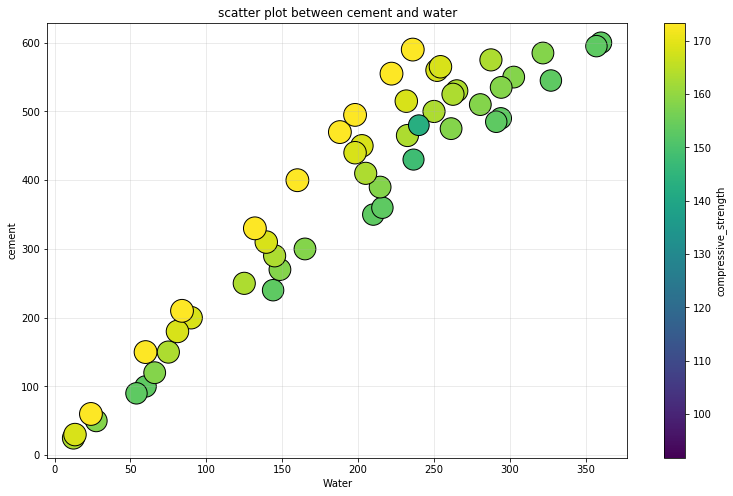

In [43]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(copres["Water"],copres["cement"],
            c=copres["Compressive strength"],s=copres["Compressive strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("compressive_strength")
plt.title("scatter plot between cement and water")
plt.grid(True,alpha=.3)
plt.show()

In [44]:
copres.columns

Index(['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength'],
      dtype='object')

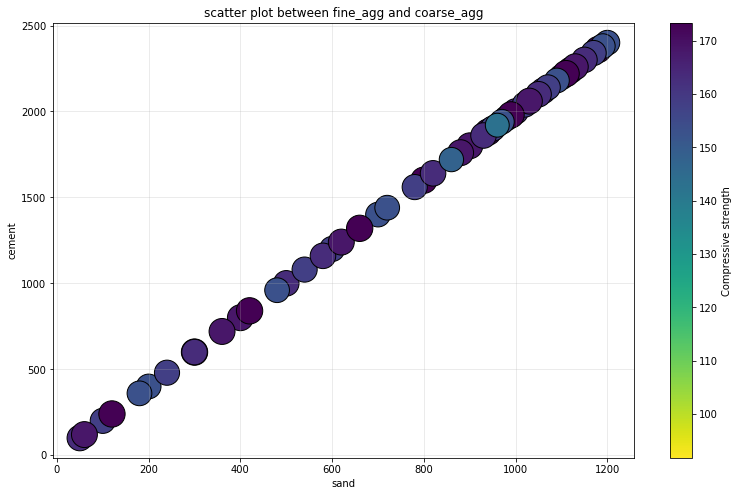

In [46]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(copres["sand"],copres["coarse aggregate"],
            c=copres["Compressive strength"],s=copres["Compressive strength"]*4,
            linewidth=1,edgecolor="k",cmap="viridis_r")
ax.set_facecolor("w")
ax.set_xlabel("sand")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("Compressive strength")
plt.title("scatter plot between fine_agg and coarse_agg")
plt.grid(True,alpha=.3)
plt.show()

In [50]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(copres, copres.Compressive strength,test_size= 0.25, random_state=32)

SyntaxError: invalid syntax (<ipython-input-50-fbd073c1e60d>, line 3)

In [51]:
copres.columns

Index(['cement', 'sand', 'coarse aggregate', 'Water', 'W/C Ratio', 'AGE(Days)',
       'Compressive strength'],
      dtype='object')